# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Nitzan Karsh 6195
# student 2: Romy Somkin 1487

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [ ]:
%pip install pandas numpy matplotlib scikit-learn

In [20]:
# project imports
import pandas as pd
from sklearn import model_selection, preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [21]:
# Load data
wine_train_df = pd.read_csv('wine_train.csv')
wine_test_df = pd.read_csv('wine_test.csv')

print(wine_test_df.head())
print(wine_train_df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.78        2.76  2.30               22.0       90.0           1.35   
1    14.02        1.68  2.21               16.0       96.0           2.65   
2    13.17        5.19  2.32               22.0       93.0           1.74   
3    11.03        1.51  2.20               21.5       85.0           2.46   
4    13.40        3.91  2.48               23.0      102.0           1.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        0.68                  0.41             1.03             9.58  0.70   
1        2.33                  0.26             1.98             4.70  1.04   
2        0.63                  0.61             1.55             7.90  0.60   
3        2.17                  0.52             2.01             1.90  1.71   
4        0.75                  0.43             1.41             7.30  0.70   

   od280/od315_of_diluted_wines  proline  target  
0          

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.117562         0.540979   
min         0.9

<Axes: ylabel='Frequency'>

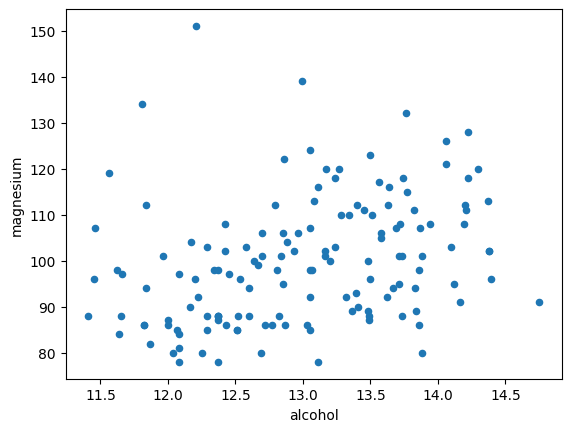

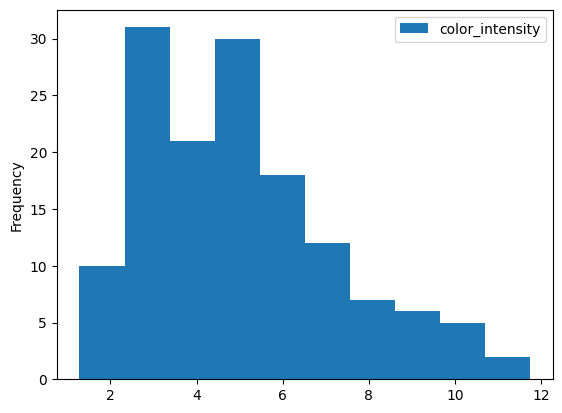

In [22]:
# Preview

# 1
print(wine_train_df.drop(columns=['target']).describe())

# 2
wine_train_df.plot.scatter(x='alcohol', y='magnesium')

# 3
print(wine_train_df.drop(columns=['target']).median())

# 4
wine_train_df[['color_intensity']].plot.hist()



## Part 3 - Experiments
You could add as many code cells as needed

In [27]:
X = wine_train_df.drop(columns=['target'])
y = wine_train_df.target

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier()
}

param_grid = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]},
    'DecisionTree': {'max_depth': [3, 5, None], 'min_samples_split': [2, 10]},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
}

best_model = None
best_score = 0
best_params = {}
best_f1 = 0

df_scoring = pd.DataFrame(columns=['model', 'params', 'best_score', 'f1'])

for model_name, model in models.items():
    grid_search = model_selection.GridSearchCV(model, param_grid[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train_scaled, y_train)
    
    y_pred = grid_search.predict(X_val_scaled)
    f1 = metrics.f1_score(y_val, y_pred, average='macro')
    
    df_scoring.loc[len(df_scoring)] = [model_name, grid_search.best_params_, grid_search.best_score_, f1]
    
    if grid_search.best_score_ > best_score and f1 >= best_f1:
        best_f1 = f1
        best_score = grid_search.best_score_
        best_model = model_name
        best_params = grid_search.best_params_

print(df_scoring)

print("\nBest Model:", best_model)

          model                                            params  best_score  \
0  RandomForest           {'max_depth': None, 'n_estimators': 50}    0.974703   
1  DecisionTree      {'max_depth': None, 'min_samples_split': 10}    0.842522   
2    KNeighbors  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}    0.975044   

         f1  
0  1.000000  
1  0.969123  
2  1.000000  

Best Model: KNeighbors


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [42]:
print(df_scoring[df_scoring['model'] == best_model]['params'].values)

X = wine_train_df.drop(columns=['target'])
y = wine_train_df.target

scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X)

# Best scoring model
knn_model = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
knn_model.fit(X_train_scaled, y)


[{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}]


KNeighborsClassifier(p=1)

## Part 5 - Apply on test and show model performance estimation

Prediction: 2, Actual: 2
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2

f1-score: 0.97

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Text(50.722222222222214, 0.5, 'True Labels')

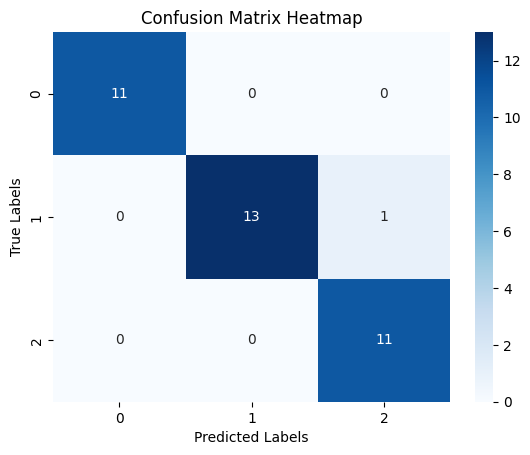

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

X_test = wine_test_df.drop(columns=['target'])
y_test = wine_test_df.target

X_test_scaled = scaler.transform(X_test)

y_pred = knn_model.predict(X_test_scaled)

f1_test = metrics.f1_score(y_test, y_pred, average='macro')

for i in range(5):
    print(f"Prediction: {y_pred[i]}, Actual: {y_test.iloc[i]}")

print(f"\nf1-score: {f1_test:.2f}")
print("\n", metrics.classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')